**This notebook is about**:
* Requesting data on corona virus from [GOV.UK Coronavirus(COVID-19) Open Data API](https://coronavirus.data.gov.uk/details/developers-guide/main-api)
* Doing some pretty quick and dirty data exploration
* Getting some simple statistics
* Visualising the results

In [1]:
from requests import get
import json

**Helper function to request data over API**

In [3]:
def get_data(url):
    response = get(url, timeout = 10)
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: {response.text}')
    return response.json()

In [4]:
endpoint = ('https://api.coronavirus.data.gov.uk/v1/data?'
            'filters=areaType=nation;areaName=england&'
            'structure={"date":"date","newCases":"newCasesByPublishDate"}'
           )

In [5]:
data = get_data(endpoint)

In [1]:
#data

**Import required modules and set Matplotlib defaults**

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

warnings.filterwarnings('ignore')

#### Analyse the dataset

In [9]:
d = data['data']
print(len(d))

741


In [10]:
print(d[0])                # sample row

{'date': '2022-02-09', 'newCases': 59193}


In [11]:
df = pd.DataFrame(d).set_index('date')
df.head()

,newCases
date,
2022-02-09,59193
2022-02-08,58453
2022-02-07,48601
2022-02-06,49533
2022-02-05,57377


In [12]:
print(df.shape)
print(type(df.index))

(741, 1)
<class 'pandas.core.indexes.base.Index'>


**Convert the index to datetime object for easy plottting**

In [13]:
df.index = df.index.map(lambda p: pd.to_datetime(p, format = '%Y-%m-%d', errors = 'ignore'))
df.head()

,newCases
date,
2022-02-09,59193
2022-02-08,58453
2022-02-07,48601
2022-02-06,49533
2022-02-05,57377


In [14]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


#### Number of New Cases by month and year

In [15]:
#df[['year', 'month', 'day']] = df.index.str.split('-', expand = True)
# df['month'] = df.index.str.split('-').map(lambda p: p[1])
# df['year'] = df.index.str.split('-').map(lambda p: p[0])
# df['day'] = df.index.str.split('-').map(lambda p: p[2])
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.head()
df.head()

,newCases,year,month,day
date,,,,
2022-02-09,59193,2022,2,9
2022-02-08,58453,2022,2,8
2022-02-07,48601,2022,2,7
2022-02-06,49533,2022,2,6
2022-02-05,57377,2022,2,5


**Monthly New Cases by Year**

In [16]:
monthly_newCases = df.groupby(['year', 'month'])['newCases'].sum()
monthly_newCases.head()

year  month
2020  1            2
      2           19
      3        20990
      4        97335
      5        34904
Name: newCases, dtype: int64

In [17]:
monthly_newCases_df = pd.DataFrame(monthly_newCases)
monthly_newCases_df.head()

newCases
year month          
2020 1             2
     2            19
     3         20990
     4         97335
     5         34904

**Visualize the results**

Text(0, 0.5, 'Number of New Cases')

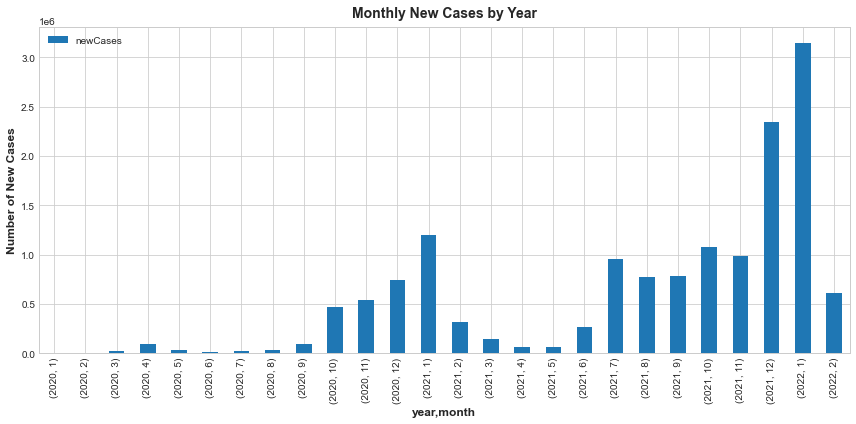

In [19]:
monthly_newCases_df.plot(kind = 'bar', figsize = (12, 6))
plt.title('Monthly New Cases by Year')
plt.ylabel('Number of New Cases')

The outbreak of **Omicron** in **December 2021 - January 2022** is clear visible on the chart. The gradual return to normalcy can also be seen from the *drastic decline* in the number of **New Cases in February 2022**!

Similar effect during the outbreak of **Delta** in **December 2020 - January 2021** can also be seen on the chart.

Text(0.5, 1.0, 'Daily New Cases in England')

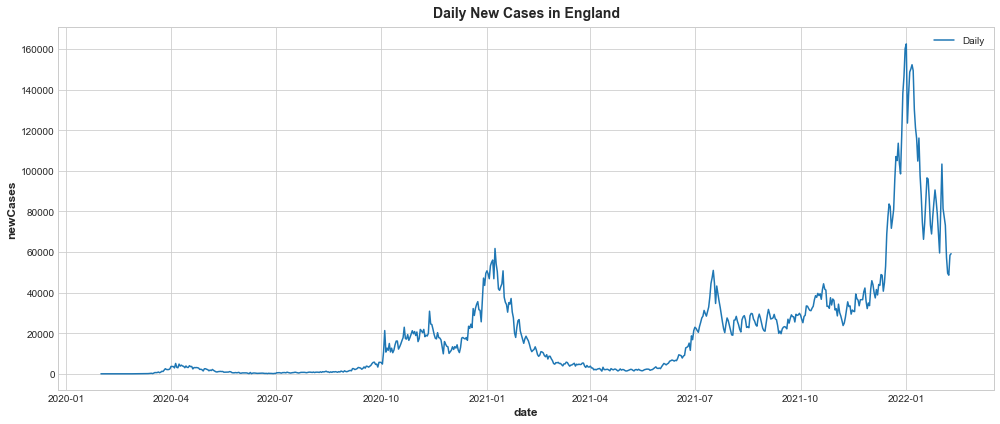

In [20]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = df.newCases, label = 'Daily')
plt.title('Daily New Cases in England')

#### Yearly Aggregate

In [21]:
df_by_year = monthly_newCases_df.reset_index()

Text(0.5, 1.0, 'Yearly Aggregate of New Cases')

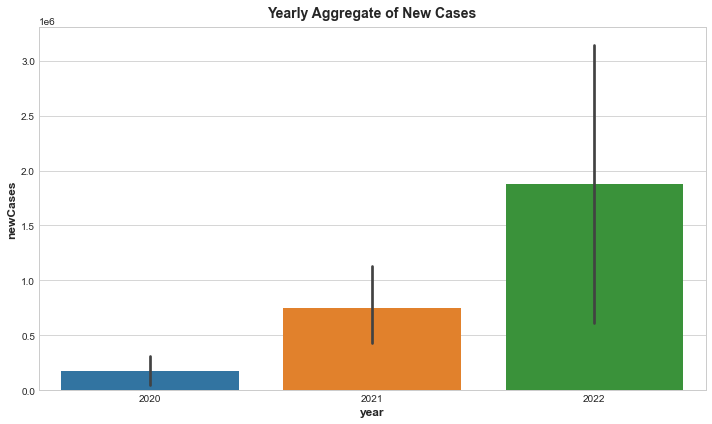

In [22]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'year',  y = 'newCases', data = df_by_year)
plt.title('Yearly Aggregate of New Cases')